In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
a = pd.read_excel('info_m1.xlsx') 

In [3]:
df = a.copy()

In [4]:
df

,text,target
0,Terrance. .thank you for serving our country. ...,spam
1,Dear Voucher Holder 2 claim your 1st class air...,spam
2,"Hi Chikku, send some nice msgs",legit
3,- - - - - - - - - - - - - - - - - - - - - - - ...,legit
4,If I get there before you after your ten billi...,legit
...,...,...
11947,Ben Affleck's History With Alcohol Addiction: ...,fake
11948,Miley Cyrus and Liam Hemsworth Still Together ...,fake
11949,Lamar Odom’s Book Will Reveal Why His Marriage...,fake
11950,Kristen Bell Shares Private Photos of Her Seco...,legit


In [5]:
df.isnull().sum()

text      17
target     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [8]:
df.shape

(11935, 2)

In [9]:
df['target'].value_counts()

target
legit    7445
fake     2871
spam     1619
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

C:\Users\sahar\AppData\Local\Temp\ipykernel_19680\155594225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = encoder.fit_transform(df['target'])


In [12]:
# 0 --> fake, 1 --> legit, 2 --> spam, 
df['target'].value_counts()

target
1    7445
0    2871
2    1619
Name: count, dtype: int64

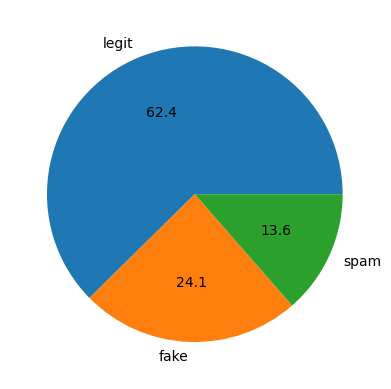

In [13]:
plt.pie(df['target'].value_counts(),labels=['legit','fake','spam'],autopct='%.1f')
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sahar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters'] = df['text'].apply(len)

C:\Users\sahar\AppData\Local\Temp\ipykernel_19680\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [17]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\sahar\AppData\Local\Temp\ipykernel_19680\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [18]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\sahar\AppData\Local\Temp\ipykernel_19680\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [19]:
df

,text,target,num_characters,num_words,num_sentences
0,Terrance. .thank you for serving our country. ...,2,101,29,3
1,Dear Voucher Holder 2 claim your 1st class air...,2,147,26,2
2,"Hi Chikku, send some nice msgs",1,30,7,1
3,- - - - - - - - - - - - - - - - - - - - - - - ...,1,7299,1701,58
4,If I get there before you after your ten billi...,1,79,17,1
...,...,...,...,...,...
11947,Ben Affleck's History With Alcohol Addiction: ...,0,102,19,1
11948,Miley Cyrus and Liam Hemsworth Still Together ...,0,79,13,1
11949,Lamar Odom’s Book Will Reveal Why His Marriage...,0,72,14,1
11950,Kristen Bell Shares Private Photos of Her Seco...,1,92,15,1


In [20]:
# for fake
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2871.000000,2871.000000,2871.000000
mean,1645.528387,313.354232,12.123302
std,2660.209455,518.286301,20.725217
min,10.000000,2.000000,1.000000
25%,65.000000,11.000000,1.000000
50%,90.000000,18.000000,1.000000
75%,2514.000000,469.000000,17.000000
max,32767.000000,6477.000000,253.000000


In [21]:
# for legit

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7445.000000,7445.000000,7445.000000
mean,1261.936199,246.892411,13.031968
std,2682.072813,524.759822,42.232950
min,1.000000,0.000000,0.000000
25%,47.000000,11.000000,1.000000
50%,98.000000,22.000000,2.000000
75%,1613.000000,306.000000,12.000000
max,32767.000000,6538.000000,1500.000000


In [22]:
# for spam
df[df['target'] == 2][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1619.000000,1619.000000,1619.000000
mean,833.814083,198.318715,13.785053
std,2771.580972,675.001276,43.933335
min,1.000000,1.000000,1.000000
25%,48.000000,10.000000,1.000000
50%,137.000000,27.000000,2.000000
75%,232.000000,49.500000,5.000000
max,26237.000000,6550.000000,382.000000


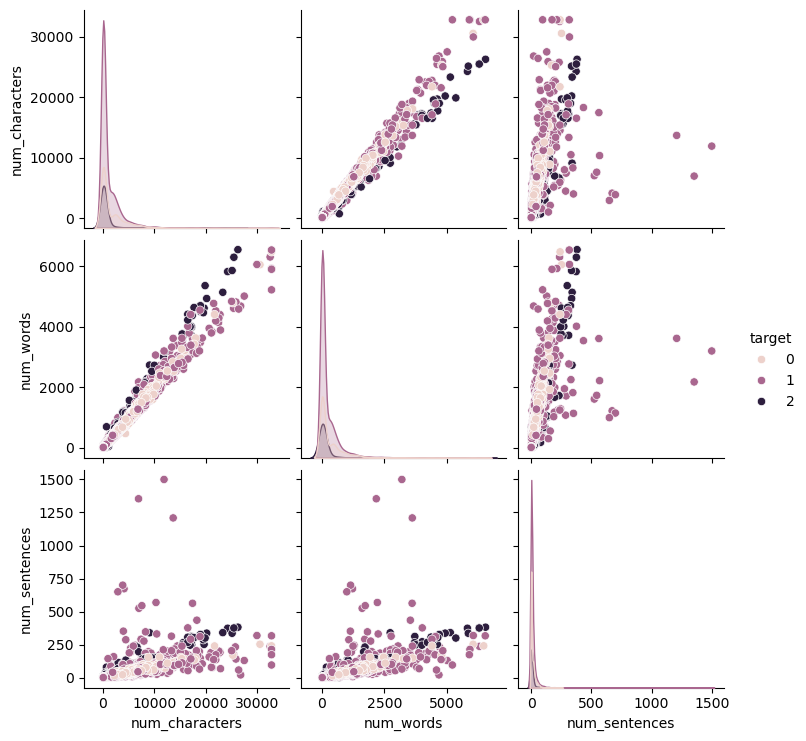

In [23]:
sns.pairplot(df,hue='target')

<Axes: >

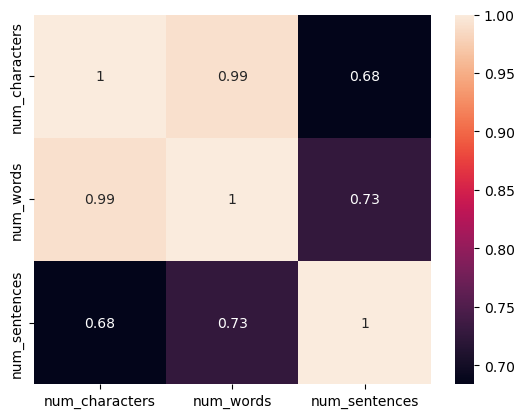

In [38]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)


In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\sahar\AppData\Local\Temp\ipykernel_19680\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [42]:
df.to_excel(r"C:\Users\sahar\OneDrive\Desktop\dataset_infoclassfication\info_transformed.xlsx",index=False)

In [104]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

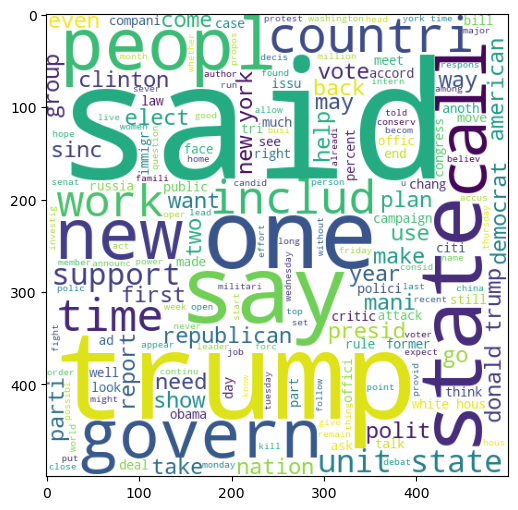

In [105]:
# for fake
plt.figure(figsize=(10,6))
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

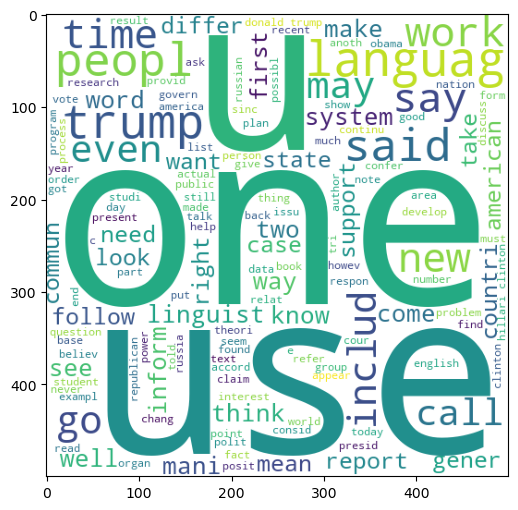

In [106]:
# for legit
plt.figure(figsize=(10,6))
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

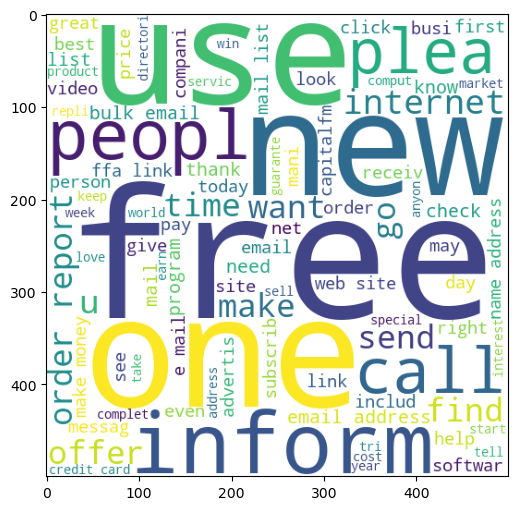

In [107]:
#for spam
plt.figure(figsize=(10,6))
spam_wc = wc.generate(df[df['target']==2]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)


# Display the plot
plt.show()

In [108]:
legit_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        legit_corpus.append(word)

In [109]:
len(legit_corpus)

859878

In [110]:
from collections import Counter

In [111]:
pd.DataFrame(Counter(legit_corpus).most_common(30))

,0,1
0,languag,5640
1,univers,4448
2,linguist,3662
3,trump,3579
4,one,3190
5,would,2733
6,use,2619
7,paper,2545
8,like,2519
9,de,2490


In [112]:
fake_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

In [113]:
pd.DataFrame(Counter(fake_corpus).most_common(30))

,0,1
0,said,6938
1,trump,4277
2,state,2848
3,would,2502
4,presid,2029
5,new,1921
6,year,1749
7,republican,1660
8,one,1627
9,peopl,1547


In [114]:
spam_corpus = []
for msg in df[df['target']==2]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [115]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,20,1149
1,order,1130
2,report,990
3,mail,899
4,address,885
5,email,820
6,free,802
7,make,760
8,000,747
9,get,727


In [116]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
#tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [117]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [118]:
X.shape

(11935, 3000)

In [119]:
y = df['target'].values

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [122]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,f1_score

In [123]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [124]:
gnb.fit(X_train,y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(y_test,ypred1))
print(precision_score(y_test,ypred1,average='weighted'))
print(f1_score(y_test,ypred1,average='weighted'))
print(confusion_matrix(y_test,ypred1))

0.5858698687517453
0.717519286011797
0.5988616151040339
[[ 669  106   35]
 [ 390 1051  840]
 [  20   92  378]]


In [125]:
mnb.fit(X_train,y_train)
ypred2 = mnb.predict(X_test)
print(accuracy_score(y_test,ypred2))
print(precision_score(y_test,ypred2,average='weighted'))
print(f1_score(y_test,ypred1,average='weighted'))
print(confusion_matrix(y_test,ypred2))

0.836917062273108
0.841002684739203
0.5988616151040339
[[ 628  180    2]
 [ 215 2044   22]
 [   3  162  325]]


In [126]:
bnb.fit(X_train,y_train)
ypred3 = bnb.predict(X_test)
print(accuracy_score(y_test,ypred3))
print(precision_score(y_test,ypred3,average='weighted'))
print(f1_score(y_test,ypred3,average='weighted'))
print(confusion_matrix(y_test,ypred3))

0.3613515777715722
0.7433373023041563
0.3695563926283344
[[ 340   21  449]
 [ 329  488 1464]
 [  19    5  466]]


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [128]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [129]:
clfs = {
    'SVC'       : svc,
    'KN'        : knc,
    'NB'        : mnb,
    'DT'        : dtc,
    'LR'        : lrc,
    'RF'        : rfc,
    'AdaBoost'  : abc,
    'ETC'       : etc,
    'GBDT'      : gbdt,
    'xgb'       : xgb,
}

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1


In [131]:
accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall,current_f1_score = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("for ",name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)
    print('recall - ',current_recall)
    print('f1_Score',current_f1_score)
    
    accuracy_score_list.append(current_accuracy)
    precision_score_list.append(current_precision)
    recall_score_list.append(current_recall)
    f1_score_list.append(current_f1_score)

for  SVC
Accuracy -  0.8659592292655682
Precision -  0.8675551197878998
recall -  0.8659592292655682
f1_Score 0.8628988143744856
for  KN
Accuracy -  0.6972912594247417
Precision -  0.7615414136346298
recall -  0.6972912594247417
f1_Score 0.6166234477674265
for  NB
Accuracy -  0.836917062273108
Precision -  0.841002684739203
recall -  0.836917062273108
f1_Score 0.8355151366702308
for  DT
Accuracy -  0.7483943032672438
Precision -  0.7880878162827754
recall -  0.7483943032672438
f1_Score 0.7106347049472388
for  LR
Accuracy -  0.8614912035744205
Precision -  0.8653655141774561
recall -  0.8614912035744205
f1_Score 0.8571724449130258
for  RF
Accuracy -  0.8793633063390115
Precision -  0.8788666193183494
recall -  0.8793633063390115
f1_Score 0.8777627968761591


C:\Users\sahar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for  AdaBoost
Accuracy -  0.7950293214185982
Precision -  0.7941974660868326
recall -  0.7950293214185982
f1_Score 0.7915508646601594
for  ETC
Accuracy -  0.8793633063390115
Precision -  0.879885818362482
recall -  0.8793633063390115
f1_Score 0.8788817296274953
for  GBDT
Accuracy -  0.8265847528623289
Precision -  0.8407377442288002
recall -  0.8265847528623289
f1_Score 0.8151226737768426
for  xgb
Accuracy -  0.8690309969282324
Precision -  0.8764132515586451
recall -  0.8690309969282324
f1_Score 0.8637037002211021


In [132]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_score_list,'Precision':precision_score_list,'Recall':recall_score_list,'f1_score':f1_score_list}).sort_values('Precision',ascending=False)

In [133]:
performance_df

,Algorithm,Accuracy,Precision,Recall,f1_score
7,ETC,0.879363,0.879886,0.879363,0.878882
5,RF,0.879363,0.878867,0.879363,0.877763
9,xgb,0.869031,0.876413,0.869031,0.863704
0,SVC,0.865959,0.867555,0.865959,0.862899
4,LR,0.861491,0.865366,0.861491,0.857172
2,NB,0.836917,0.841003,0.836917,0.835515
8,GBDT,0.826585,0.840738,0.826585,0.815123
6,AdaBoost,0.795029,0.794197,0.795029,0.791551
3,DT,0.748394,0.788088,0.748394,0.710635
1,KN,0.697291,0.761541,0.697291,0.616623


In [134]:
# Voting Classifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [135]:
voting = VotingClassifier(estimators=[('etc', etc), ('rf', rfc), ('xgb', xgb)],voting='soft')

In [136]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            ev...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [137]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test, y_pred))
print('Precision',precision_score(y_test, y_pred, average = 'weighted'))
print('Recall',recall_score(y_test, y_pred, average='weighted'))
print('F1_score',f1_score(y_test, y_pred, average='weighted'))

Accuracy 0.8947221446523318
Precision 0.8954655365454369
Recall 0.8947221446523318
F1_score 0.892718994660537


In [138]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['fake', 'legit', 'spam'])
print(report)

              precision    recall  f1-score   support

        fake       0.90      0.81      0.85       810
       legit       0.89      0.96      0.92      2281
        spam       0.91      0.75      0.82       490

    accuracy                           0.89      3581
   macro avg       0.90      0.84      0.87      3581
weighted avg       0.90      0.89      0.89      3581



In [139]:
from sklearn.ensemble import StackingClassifier

In [140]:
estimators = [('etc', etc), ('rf', rfc), ('xgb', xgb)]
final_estimator = SVC(kernel='sigmoid', gamma=1.0)

In [141]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [142]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2)),
                               ('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=2, ...))],
                   final_estimator=SVC(gamma=1.0, kernel='sigmoid'))

In [143]:
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test, y_pred, average = 'weighted'))
print('Recall',recall_score(y_test, y_pred, average='weighted'))
print('F1_score',f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8721027645908964
Precision 0.8744151512580552
Recall 0.8721027645908964
F1_score 0.8691465276237358


In [144]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf, open('model.pkl','wb'))